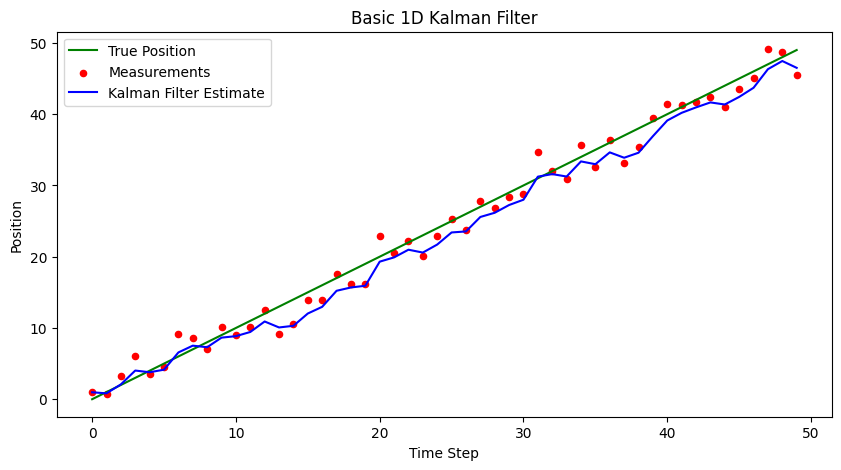

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic noisy measurements (true position = 1 per step)
np.random.seed(42)
n_steps = 50
true_position = np.linspace(0, n_steps-1, n_steps)
measurements = true_position + np.random.normal(0, 2, n_steps)  # noisy GPS-like data

# Kalman Filter parameters
x = 0.0       # initial state (position)
P = 1.0       # initial uncertainty
F = 1.0       # state transition (position -> position)
H = 1.0       # measurement function
R = 0.02      # measurement noise covariance
Q = 0.009      # process noise covariance

estimates = []

for z in measurements:
    # --- Prediction ---
    x = F * x
    P = F * P * F + Q

    # --- Update ---
    K = P * H / (H * P * H + R)     # Kalman gain
    x = x + K * (z - H * x)         # update estimate
    P = (1 - K * H) * P             # update uncertainty

    estimates.append(x)

# Plot results
plt.figure(figsize=(10,5))
plt.plot(true_position, label="True Position", c="g")
plt.scatter(range(n_steps), measurements, label="Measurements", c="r", s=20)
plt.plot(estimates, label="Kalman Filter Estimate", c="b")
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("Basic 1D Kalman Filter")
plt.show()